In [16]:
%matplotlib inline  
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from sim.netrual import Component, NLT_reserve, NLT_components  # noqa
from sim.data import get_batch_price
import pandas as pd


## Prepare market Data

In [18]:
target = ['EOS', 'OMG', 'ELF', 'INS', 'MANA', 'IOST', 'ARK', 'ETH']
market_prices = get_batch_price(target)
m = market_prices
m.head()

,EOS,timestamp,OMG,ELF,INS,MANA,IOST,ARK,ETH
0,9.513628,1.517762e+09,12.220460,1.424711,2.778753,0.101204,0.041005,4.420315,872.89
1,9.571649,1.517762e+09,12.150611,1.428336,2.767728,0.100280,0.040984,4.418087,872.45
2,9.503056,1.517762e+09,12.242008,1.422520,2.715798,0.098882,0.040767,4.403600,872.00
3,9.447612,1.517763e+09,12.094019,1.414750,2.718675,0.099569,0.040694,4.351696,867.39
4,9.428780,1.517763e+09,12.042690,1.434984,2.747469,0.098874,0.041125,4.343819,865.82


## Define

### Price I:

\begin{gather*}
\frac{Highest(Price_{cmponents}) \times min_{bid}(Highest(Price_{cmponents}))}{1000}
\end{gather*}

### Price II:

\begin{gather*}
\frac{\sum{component_{reserve}}}{NLT_{total\ supply}}
\end{gather*}

### Auction:

\begin{gather*}
Auction(\frac{price_{NLT}}{price_{Component}}\times 1000) \iff Price_{NLT} > \frac{Price_{Token} \times NLT_{min bid}}{1000}
\end{gather*}

### Redeem:

\begin{gather*}
Redeem \iff Price_{NLT}<\frac{Price_{Token} \times NLT_{min bid}}{1000}
\end{gather*}

## Simulation

In [19]:
from sim.utils import redeem_strategy, auction_strategy
from sim.simulator import sim_loop
from sim.netrual import NLT_accounts
import random

# NLT_accounts['satoshi'] = 10000000000000

In [20]:
res = sim_loop(m)

True
True
True
True
True
True
True
True
EOS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 108000.0}
OMG:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 109000.0}
ELF:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 110000.0}
INS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 111000.0}
MANA:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 112000.0}
IOST:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 113000.0}
ARK:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 114000.0}
ETH:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 115000.0}
PRICE OF NLT 15.000000000000002
plan to redeem {} for
Redeemed {}
PRICE OF NLT 15.091480620215247
plan to redeem {} for
Redeemed {}
PRICE OF NLT 15.026449086204611
pl

EOS:: New cycle 43
OMG:: New cycle 43
ELF:: New cycle 43
INS:: New cycle 43
MANA:: New cycle 43
IOST:: New cycle 43
ARK:: New cycle 43
ETH:: New cycle 43
PRICE OF NLT 10.995543539277573
plan to redeem {} for
Redeemed {}
plan to auction {}
Auctioned {}
PRICE OF NLT 10.910137588928732
plan to redeem {} for
Redeemed {}
PRICE OF NLT 10.802907582856946
plan to redeem {} for
Redeemed {}
PRICE OF NLT 10.740184903023291
plan to redeem {} for
Redeemed {}
PRICE OF NLT 10.671791405560837
plan to redeem {} for
Redeemed {}
PRICE OF NLT 10.906700729759764
plan to redeem {} for
Redeemed {}
PRICE OF NLT 10.885735888829064
plan to redeem {} for
Redeemed {}
PRICE OF NLT 10.757369198868128
plan to redeem {} for
Redeemed {}
PRICE OF NLT 10.601335792597006
plan to redeem {} for
Redeemed {}
PRICE OF NLT 10.44994214620399
plan to redeem {} for
Redeemed {}
PRICE OF NLT 10.570060374159402
plan to redeem {} for
Redeemed {}
PRICE OF NLT 10.589822314380964
plan to redeem {} for
Redeemed {}
EOS:: New cycle 44
OMG:

Redeemed {}
plan to auction {}
Auctioned {}
PRICE OF NLT 15.56661482428595
plan to redeem {} for
Redeemed {}
PRICE OF NLT 15.415186326259187
plan to redeem {} for
Redeemed {}
PRICE OF NLT 15.201906146187612
plan to redeem {} for
Redeemed {}
PRICE OF NLT 15.251223269390008
plan to redeem {} for
Redeemed {}
PRICE OF NLT 15.040176692271663
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.760454605638895
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.452902152282217
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.303283361757712
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.312506793196329
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.68397556623144
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.62921005254723
plan to redeem {} for
Redeemed {}
EOS:: New cycle 80
OMG:: New cycle 80
ELF:: New cycle 80
INS:: New cycle 80
MANA:: New cycle 80
IOST:: New cycle 80
ARK:: New cycle 80
ETH:: New cycle 80
PRICE OF NLT 14.586049788447514
plan to redeem {} for
Redeemed {}
plan to aucti

Redeemed {}
PRICE OF NLT 17.289100649973022
plan to redeem {} for
Redeemed {}
PRICE OF NLT 17.237352797611166
plan to redeem {} for
Redeemed {}
PRICE OF NLT 17.295032221982883
plan to redeem {} for
Redeemed {}
PRICE OF NLT 17.450437333628443
plan to redeem {} for
Redeemed {}
PRICE OF NLT 17.549120491046814
plan to redeem {} for
Redeemed {}
PRICE OF NLT 17.489786985125125
plan to redeem {} for
Redeemed {}
PRICE OF NLT 17.53202090427077
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.010170526519648
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.172486912598487
plan to redeem {} for
Redeemed {}
PRICE OF NLT 17.93374484458155
plan to redeem {} for
Redeemed {}
PRICE OF NLT 17.77075704368001
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.214679331490196
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.164127575733023
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.451235225415545
plan to redeem {} for
Redeemed {}
PRICE OF NLT 19.094533626074803
plan to redeem {} for
Redeemed {}
P

PRICE OF NLT 18.094318219994822
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.092035706028007
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.040990393679312
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.18155768238867
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.127933425687864
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.071493080326704
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.155323593289605
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.325129293053056
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.261389349453875
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.27288343764389
plan to redeem {} for
Redeemed {}
PRICE OF NLT 18.206635692985074
plan to redeem {} for
Redeemed {}
EOS:: New cycle 126
OMG:: New cycle 126
ELF:: New cycle 126
INS:: New cycle 126
MANA:: New cycle 126
IOST:: New cycle 126
ARK:: New cycle 126
ETH:: New cycle 126
PRICE OF NLT 18.336602631116097
plan to redeem {} for
Redeemed {}
plan to auction {}
Auctioned {}
PRICE OF NLT 18.

PRICE OF NLT 14.873695425540447
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.881772044587521
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.888302077008559
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.889504977717698
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.690167145917584
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.632427911878931
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.469005258394528
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.555785952410957
plan to redeem {} for
Redeemed {}
EOS:: New cycle 144
OMG:: New cycle 144
ELF:: New cycle 144
INS:: New cycle 144
MANA:: New cycle 144
IOST:: New cycle 144
ARK:: New cycle 144
ETH:: New cycle 144
PRICE OF NLT 14.563690728499584
plan to redeem {} for
Redeemed {}
plan to auction {}
Auctioned {}
PRICE OF NLT 14.460756796389006
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.391504084134315
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.329984305009795
plan to redeem {} for
Redeemed {}
PRICE OF NLT 1

Redeemed {}
PRICE OF NLT 14.362290781198089
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.404392306017943
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.262793708256483
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.202820515757999
plan to redeem {} for
Redeemed {}
EOS:: New cycle 170
OMG:: New cycle 170
ELF:: New cycle 170
INS:: New cycle 170
MANA:: New cycle 170
IOST:: New cycle 170
ARK:: New cycle 170
ETH:: New cycle 170
PRICE OF NLT 14.213990308057143
plan to redeem {} for
Redeemed {}
plan to auction {}
Auctioned {}
PRICE OF NLT 14.181511988910401
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.272932442804937
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.226191158106978
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.14267548030107
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.135801761963135
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.196806012212306
plan to redeem {} for
Redeemed {}
PRICE OF NLT 14.223613513730253
plan to redeem {} for
Redeemed {}
PRI

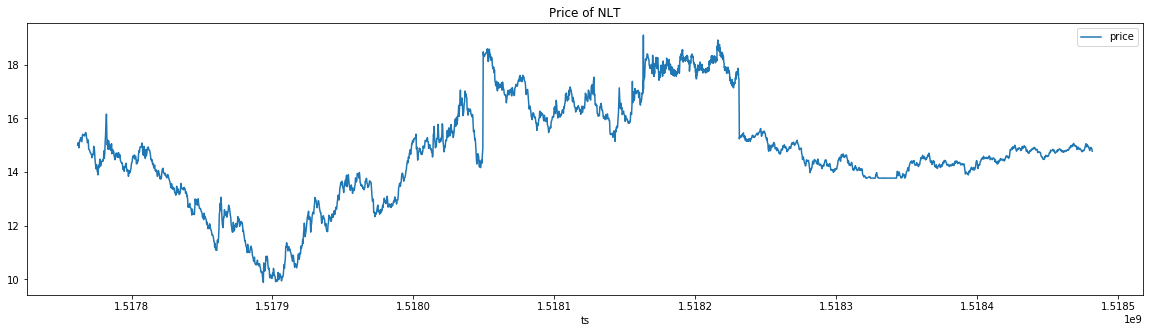

In [21]:
res = pd.DataFrame(res)
res.plot(y='price', x='ts', title="Price of NLT", figsize=(20, 5))

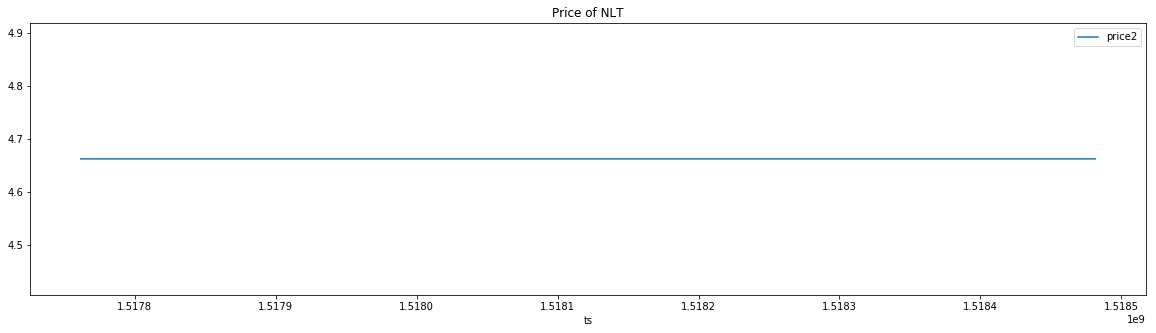

In [22]:
res = pd.DataFrame(res)
res.plot(y='price2', x='ts', title="Price of NLT", figsize=(20, 5))

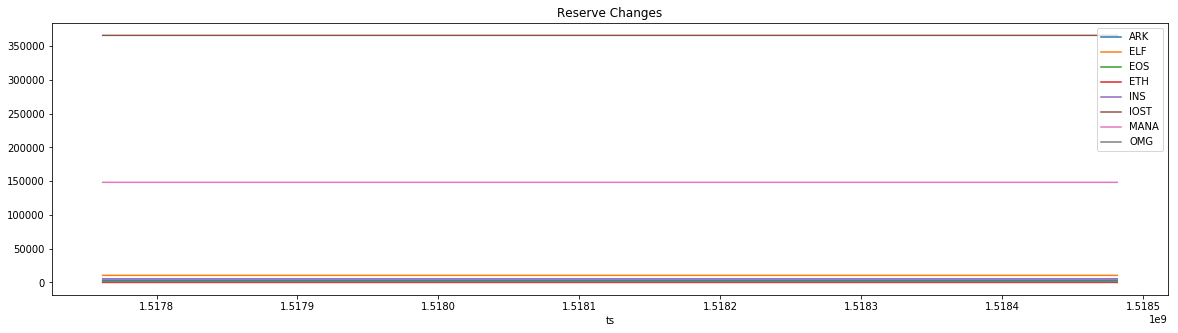

In [34]:
res.drop(columns=['price', 'price2']).plot(title='Reserve Changes', x='ts', figsize=(20, 5))

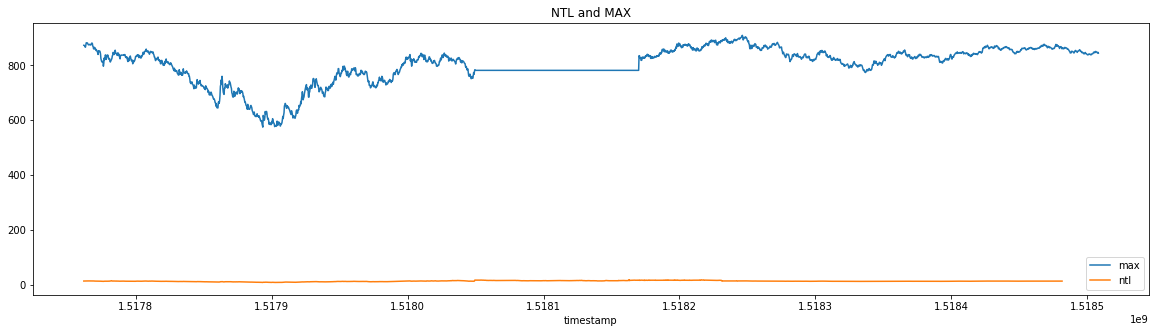

In [35]:
pd.DataFrame({
    'max': m.drop(columns=['timestamp']).T.max(),
    'timestamp': m.timestamp,
    'ntl': res.price
}).plot(x='timestamp', title="NTL and MAX", figsize=(20, 5))

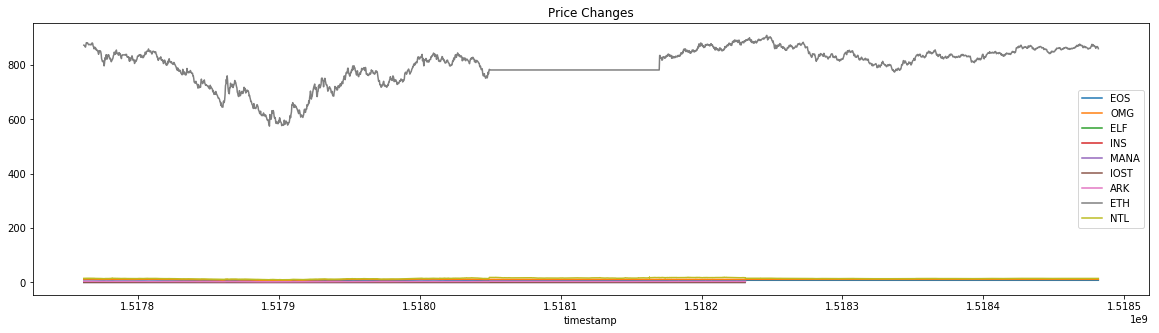

In [36]:
pd.merge(m,
         pd.DataFrame(dict(NTL=res['price'], timestamp=res['ts'])),
         on='timestamp').plot(x='timestamp', title="Price Changes", figsize=(20, 5))

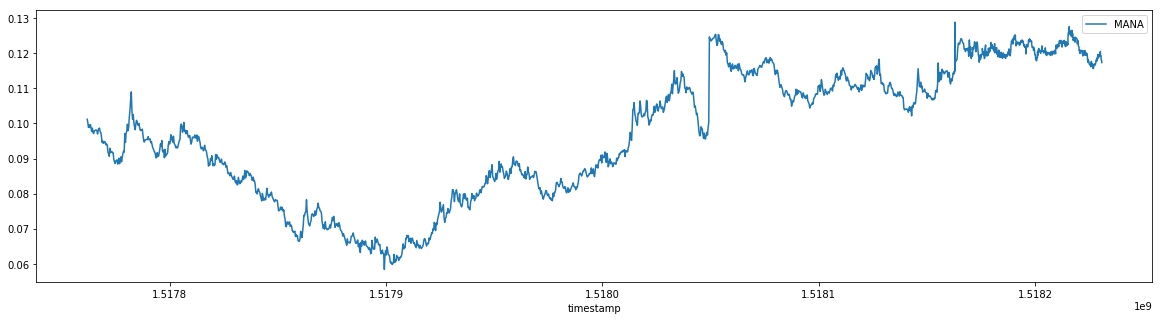

In [37]:
m.plot(y='MANA', x='timestamp', figsize=(20, 5))

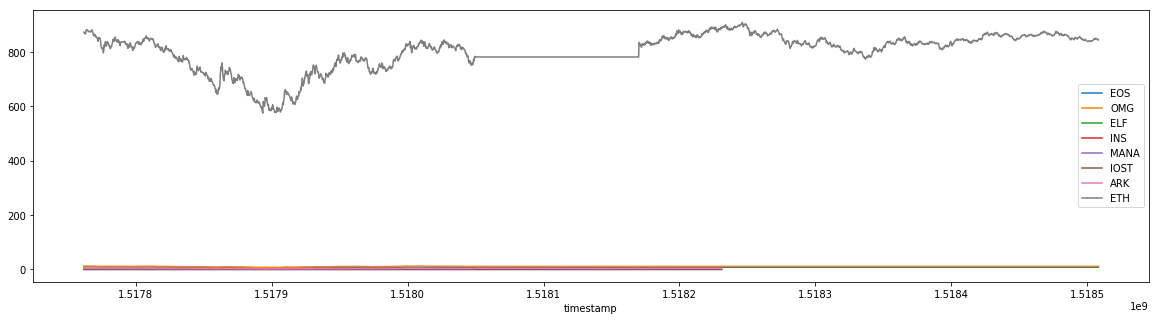

In [38]:
m.plot(x='timestamp', figsize=(20, 5))

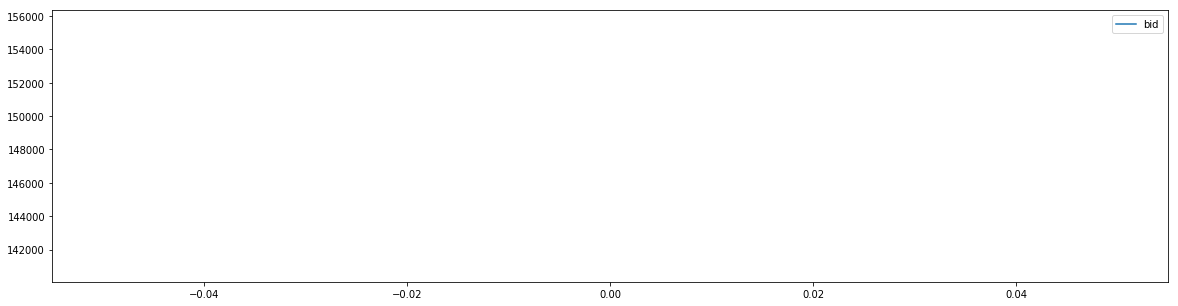

In [39]:
pd.DataFrame([v for v in NLT_components['MANA'].minted.values()]).plot(figsize=(20, 5))

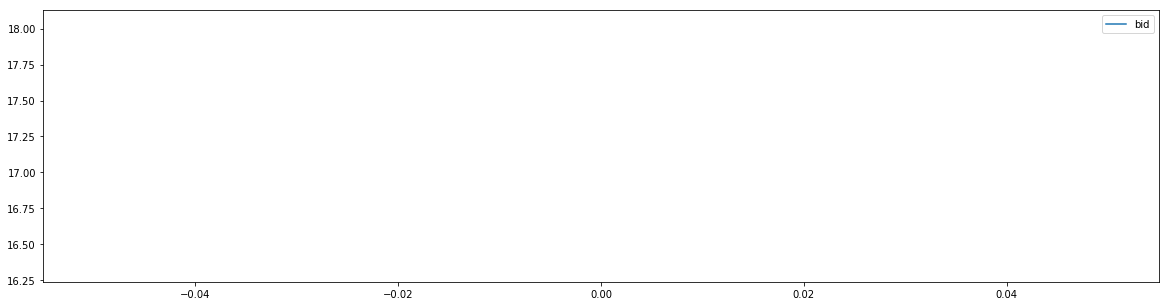

In [31]:
pd.DataFrame([v for v in NLT_components['ETH'].minted.values()]).plot(figsize=(20, 5))

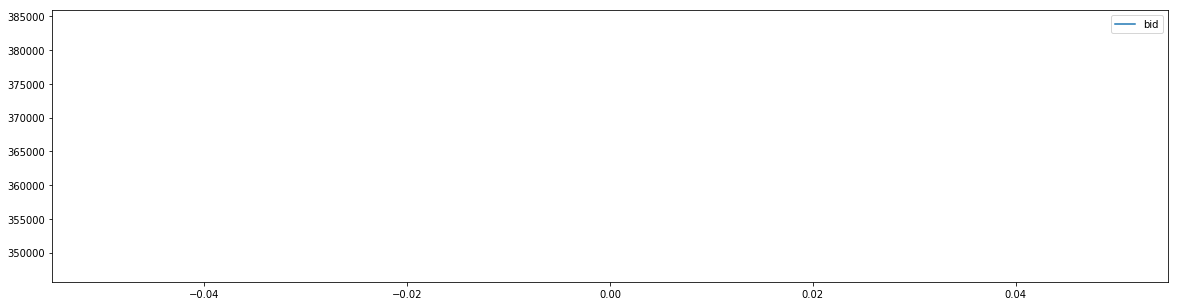

In [32]:
pd.DataFrame([v for v in NLT_components['IOST'].minted.values()]).plot(figsize=(20, 5))